# Sentiment Analysis

In [1]:
import pandas as pd 
PositiveWords=pd.read_table('Positive_words.txt',encoding='latin-1')
NegativeWords=pd.read_table('Negative_words.txt',encoding='latin-1')

In [2]:
PositiveWords.head()

,PositiveWords
0,abound
1,abounds
2,abundance
3,abundant
4,accessable


In [3]:
NegativeWords.head()

,NegativeWords
0,2-faced
1,2-faces
2,abnormal
3,abolish
4,abominable


### Defining a Sentiment Score function using Bag of words

In [4]:
# Defining a function to take a sentence as input and provide a sentiment fo it.
def ComputeSentimentScore(inputSentence):
    import re 
    
    PositiveScore=0
    NegativeScore=0
    OverallSentiment=''
    
    # converting every word in lowercase
    newSentence=inputSentence.lower()
    
    # Removing everything which is not alphabets
    WordList= re.sub(r'[^a-z A-Z]',r'',newSentence)
    
     # Splitting the sentence into list of words
    WordList=WordList.split()
    
    # Iterate every word and check if it is present in the positive or negative word list
    for newWord in WordList:
        #print(newWord)
        if (newWord in NegativeWords.values):
            NegativeScore+=1
        if (newWord in PositiveWords.values):
            PositiveScore+=1
            
        
        
            
            
            
            
     
    if((PositiveScore-NegativeScore) > 0):
        OverallSentiment='Positive'
    
    elif((PositiveScore-NegativeScore) == 0):
        OverallSentiment='Neutral'
    
    else:
        OverallSentiment='Negative'
        
    return(OverallSentiment)

### Calling the sentiment score function for random Sentence 


In [5]:
RandomSentence='i love you abhishek'
ComputeSentimentScore(RandomSentence)


'Positive'

In [6]:
IndigoTweets=pd.read_csv('Indigo Tweets.csv', encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head()

(1077, 1)


,Tweets
0,Hackers galore Also being sued for passed deb...
1,Hackers galore Also being sued for passed deb...
2,London England UK Come rock with ya girl Fri...
3,NewsAlert BengaluruVijaywada Indigo flight 6E...
4,Hackers galore Also being sued for passed debt...


### Calling the sentiment score function for a column in dataframe

In [7]:
IndigoTweets=pd.read_csv('Indigo Tweets.csv', encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head()

(1077, 1)


,Tweets
0,Hackers galore Also being sued for passed deb...
1,Hackers galore Also being sued for passed deb...
2,London England UK Come rock with ya girl Fri...
3,NewsAlert BengaluruVijaywada Indigo flight 6E...
4,Hackers galore Also being sued for passed debt...


In [8]:
# Calling sentiment score function for every tweet
IndigoTweets['Sentiment']=IndigoTweets['Tweets'].apply(ComputeSentimentScore)
IndigoTweets.head()

,Tweets,Sentiment
0,Hackers galore Also being sued for passed deb...,Neutral
1,Hackers galore Also being sued for passed deb...,Neutral
2,London England UK Come rock with ya girl Fri...,Neutral
3,NewsAlert BengaluruVijaywada Indigo flight 6E...,Neutral
4,Hackers galore Also being sued for passed debt...,Neutral


<AxesSubplot:ylabel='None'>

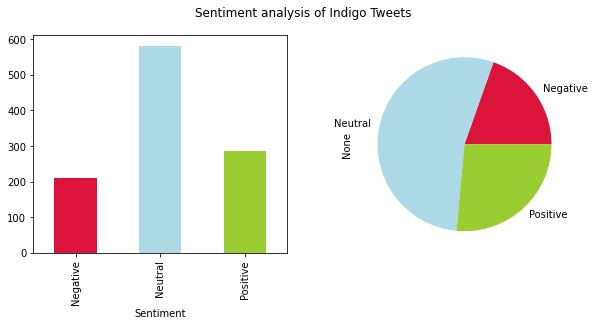

In [11]:
# Visualizing the overall sentiment distribution
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Indigo Tweets")

# Grouping the data
GroupedData=IndigoTweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue','yellowgreen'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue','yellowgreen'])